In [45]:
# Import dependencies
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display



In [32]:
# Connect to SQLite database
conn = sqlite3.connect('Yelp.db')

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('data/yelp_data_clean.csv')

# Store the DataFrame into a SQLite table
df.to_sql('yelp_data_table', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

In [33]:
# Use SQL queries to retrieve the data for visualisation

# Reconnect to the SQLite database
conn = sqlite3.connect('Yelp.db')

# Retrieve all data from the table
query = "SELECT * FROM yelp_data_table"
data_for_visualisation = pd.read_sql_query(query, conn)
data_for_visualisation.head()



,id,business_name,categories,rating,review_count,price,image_url,url,phone,distance,latitude,longitude,location,postcode,address
0,0,Lot Twenty,"['Bars', 'Restaurants']",4.2,85,$$,https://s3-media1.fl.yelpcdn.com/bphoto/t-Crn8...,https://www.yelp.com/biz/lot-twenty-perth?adju...,+61 8 6162 1195,46.38,-31.949332,115.859543,Perth,6000,"206/198-206 William St, Perth, 6000"
1,1,Angel Falls Grill,"['Latin American', 'Bars', 'Gluten-Free']",4.3,35,$$,https://s3-media1.fl.yelpcdn.com/bphoto/_NCdZw...,https://www.yelp.com/biz/angel-falls-grill-per...,+61 8 9481 6222,629.51,-31.951890,115.853620,Perth,6000,"Shop 16, Shafto Lane, Perth, 6000"
2,3,The Standard,"['Tapas/Small Plates', 'Wine Bars', 'Venues & ...",4.4,75,$$,https://s3-media2.fl.yelpcdn.com/bphoto/Rk8goQ...,https://www.yelp.com/biz/the-standard-northbri...,+61 8 9228 1331,148.76,-31.949290,115.857880,Northbridge,6003,"28 Roe St, Northbridge, 6003"
3,4,Hao Szechuan,['Szechuan'],5.0,1,$$,https://s3-media2.fl.yelpcdn.com/bphoto/FQklmY...,https://www.yelp.com/biz/hao-szechuan-northbri...,+61 8 9228 0636,213.25,-31.947222,115.858364,Northbridge,6003,"74 Francis St, Northbridge, 6003"
4,5,Dragon Palace,"['Chinese', 'Seafood']",3.7,26,$$,https://s3-media2.fl.yelpcdn.com/bphoto/jEGTKg...,https://www.yelp.com/biz/dragon-palace-northbr...,+61 8 9228 2888,188.37,-31.947367,115.858639,Northbridge,6003,"66 Francis St, Northbridge, 6003"


In [34]:
# Perform your visualisation using data_for_visualisation DataFrame
data_for_visualisation.columns

Index(['id', 'business_name', 'categories', 'rating', 'review_count', 'price',
       'image_url', 'url', 'phone', 'distance', 'latitude', 'longitude',
       'location', 'postcode', 'address'],
      dtype='object')

In [35]:
df = data_for_visualisation
df.head()

,id,business_name,categories,rating,review_count,price,image_url,url,phone,distance,latitude,longitude,location,postcode,address
0,0,Lot Twenty,"['Bars', 'Restaurants']",4.2,85,$$,https://s3-media1.fl.yelpcdn.com/bphoto/t-Crn8...,https://www.yelp.com/biz/lot-twenty-perth?adju...,+61 8 6162 1195,46.38,-31.949332,115.859543,Perth,6000,"206/198-206 William St, Perth, 6000"
1,1,Angel Falls Grill,"['Latin American', 'Bars', 'Gluten-Free']",4.3,35,$$,https://s3-media1.fl.yelpcdn.com/bphoto/_NCdZw...,https://www.yelp.com/biz/angel-falls-grill-per...,+61 8 9481 6222,629.51,-31.951890,115.853620,Perth,6000,"Shop 16, Shafto Lane, Perth, 6000"
2,3,The Standard,"['Tapas/Small Plates', 'Wine Bars', 'Venues & ...",4.4,75,$$,https://s3-media2.fl.yelpcdn.com/bphoto/Rk8goQ...,https://www.yelp.com/biz/the-standard-northbri...,+61 8 9228 1331,148.76,-31.949290,115.857880,Northbridge,6003,"28 Roe St, Northbridge, 6003"
3,4,Hao Szechuan,['Szechuan'],5.0,1,$$,https://s3-media2.fl.yelpcdn.com/bphoto/FQklmY...,https://www.yelp.com/biz/hao-szechuan-northbri...,+61 8 9228 0636,213.25,-31.947222,115.858364,Northbridge,6003,"74 Francis St, Northbridge, 6003"
4,5,Dragon Palace,"['Chinese', 'Seafood']",3.7,26,$$,https://s3-media2.fl.yelpcdn.com/bphoto/jEGTKg...,https://www.yelp.com/biz/dragon-palace-northbr...,+61 8 9228 2888,188.37,-31.947367,115.858639,Northbridge,6003,"66 Francis St, Northbridge, 6003"


In [36]:
df['categories'].unique

<bound method Series.unique of 0                                ['Bars', 'Restaurants']
1              ['Latin American', 'Bars', 'Gluten-Free']
2      ['Tapas/Small Plates', 'Wine Bars', 'Venues & ...
3                                           ['Szechuan']
4                                 ['Chinese', 'Seafood']
                             ...                        
527                                            ['Cafes']
528                                        ['Fast Food']
529                                           ['Indian']
530                          ['Burgers', 'Coffee & Tea']
531                      ['Restaurants', 'Coffee & Tea']
Name: categories, Length: 532, dtype: object>

In [37]:
# Group data by restaurant categories and calculate the mean review count for each category
category_review_count = df.groupby('categories')['review_count'].mean()
category_review_count

categories
['African', 'Gluten-Free', 'Middle Eastern']      2.0
['American', 'Burgers', 'Pizza']                  8.0
['American', 'Cocktail Bars']                    39.0
['American']                                     53.0
['Argentine', 'Latin American']                   2.0
                                                ...  
['Wine Bars', 'Australian']                      19.0
['Wine Bars', 'Beer Bar', 'Australian']         104.0
['Wine Bars', 'French']                          43.0
['Wine Bars', 'Italian']                         52.0
['Wine Bars', 'Vietnamese', 'Pizza']             36.0
Name: review_count, Length: 234, dtype: float64

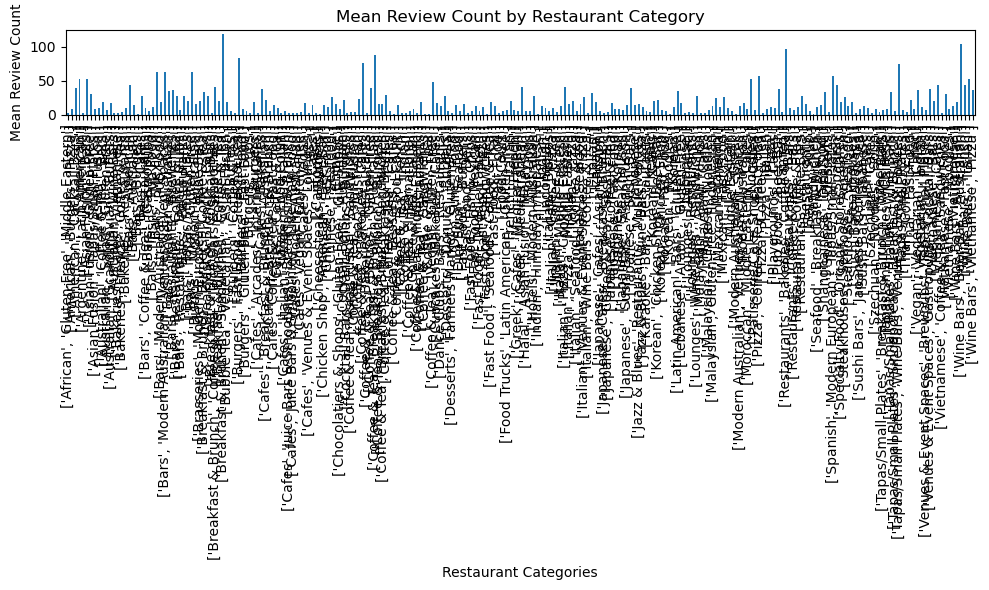

In [38]:
# Group data by restaurant categories and calculate the mean review count for each category
category_review_count = df.groupby('categories')['review_count'].mean()

# Plotting
plt.figure(figsize=(10, 6))
category_review_count.plot(kind='bar')
plt.xlabel('Restaurant Categories')
plt.ylabel('Mean Review Count')
plt.title('Mean Review Count by Restaurant Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question1. 	How does the distance of a business from General Post Office (GPO) as a reference point correlate with its rating and review count?

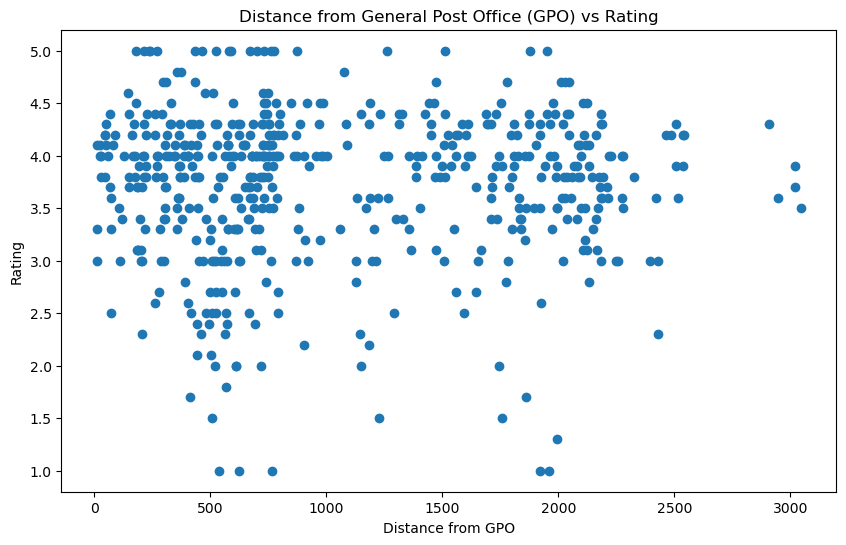

In [39]:
# Plotting distance vs rating
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['rating'])
plt.xlabel('Distance from GPO')
plt.ylabel('Rating')
plt.title('Distance from General Post Office (GPO) vs Rating')
#plt.savefig('Resources/tsunami_pie_chart')
plt.show()


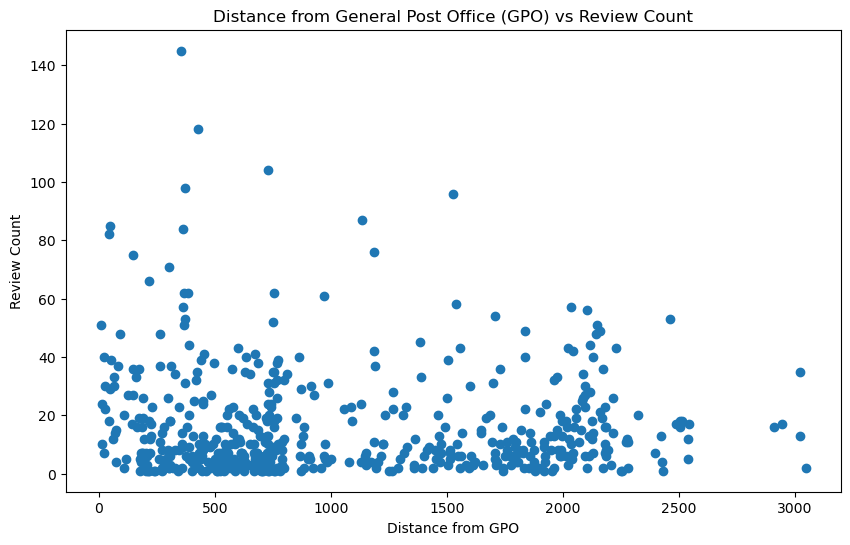

In [40]:
# Plotting distance vs review count
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['review_count'])
plt.xlabel('Distance from GPO')
plt.ylabel('Review Count')
plt.title('Distance from General Post Office (GPO) vs Review Count')
plt.show()

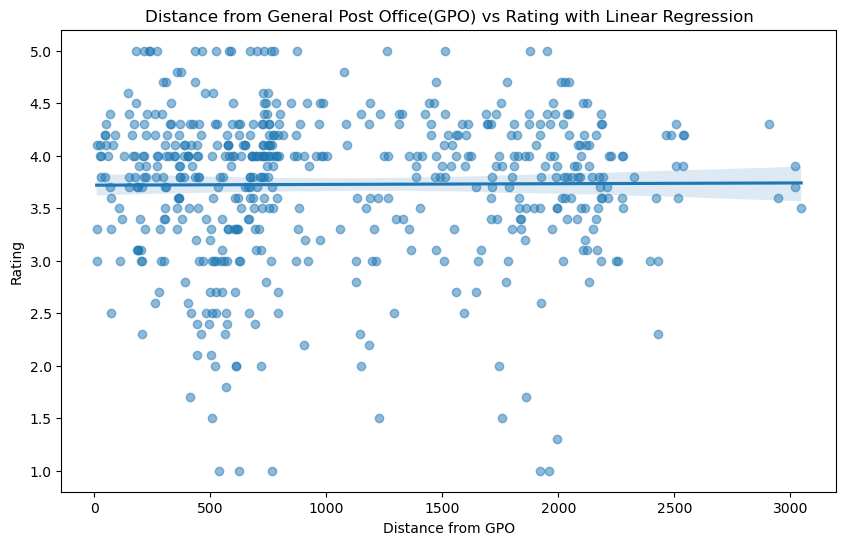

In [41]:
# Plotting distance vs rating with linear regression
plt.figure(figsize=(10, 6))
sns.regplot(x='distance', y='rating', data=df, scatter=True, scatter_kws={'alpha':0.5})
plt.xlabel('Distance from GPO')
plt.ylabel('Rating')
plt.title('Distance from General Post Office(GPO) vs Rating with Linear Regression')
plt.show()

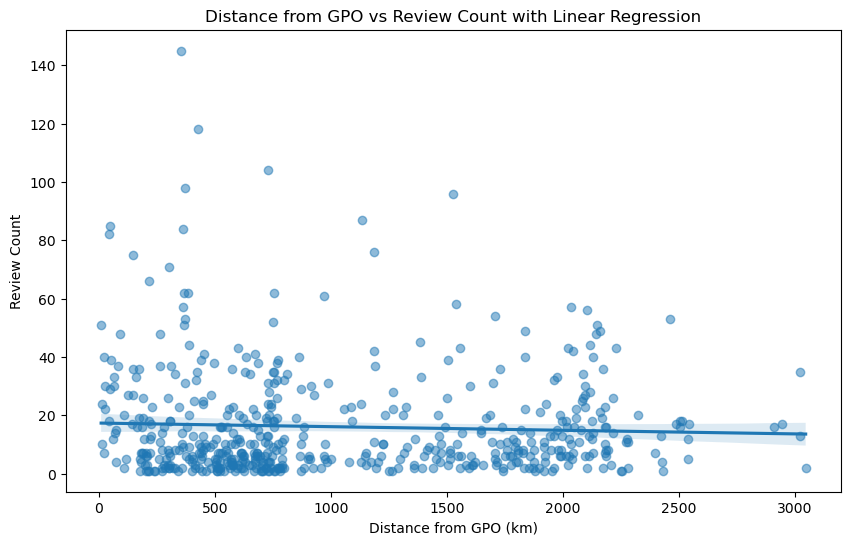

In [42]:
# Plotting distance vs review count with linear regression
plt.figure(figsize=(10, 6))
sns.regplot(x='distance', y='review_count', data=df, scatter=True, scatter_kws={'alpha':0.5})
plt.xlabel('Distance from GPO (km)')
plt.ylabel('Review Count')
plt.title('Distance from GPO vs Review Count with Linear Regression')
plt.show()

In [ ]:
# # Create dropdown widgets for selecting x-axis and y-axis variables
# x_axis_dropdown = widgets.Dropdown(options=['distance', 'review_count'], description='X-axis:')
# y_axis_dropdown = widgets.Dropdown(options=['rating', 'review_count'], description='Y-axis:')

# # Define function to update the scatter plot based on dropdown selections
# def update_scatter_plot(x_axis, y_axis):
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(x=x_axis, y=y_axis, data=df, alpha=0.5)
#     plt.xlabel(x_axis.capitalize())
#     plt.ylabel(y_axis.capitalize())
#     plt.title(f'{y_axis.capitalize()} vs {x_axis.capitalize()}')
#     plt.show()

# # Create interactive widget
# interactive_plot = widgets.interactive(update_scatter_plot, x_axis=x_axis_dropdown, y_axis=y_axis_dropdown)

# # Display the interactive widget
# display(interactive_plot)

In [43]:
# Don't forget to close the connection when you're done
conn.close()